## Single Layer Perceptron

### Aadityaa.N, 21BCE1964

#### A single layer perceptron (SLP) is a feed-forward network based on athreshold transfer function. The single layer perceptron algorithm is a simple and effective way to train an artificial neural network to classify inputs into two categories. 

- The algorithm starts by initializing the weights for each input to random values,including a bias weight. 
- Then, the perceptron is presented with a set of inputs and produces an output based on the weighted sum of those inputs and a threshold value. 
- If the output is correct, the algorithm moves on to the next set of inputs. If the output is incorrect, the algorithm adjusts the weights using the perceptron learning rule. T
- his rule updates the weights based on the difference between the actual output and the desired output, and the magnitude of the input. 
- By repeatedly presenting the perceptron with training examples, the perceptron learns to adjust its weights to accurately classify new inputs. 
- While the single layer perceptron algorithm is limited to linearly separable problems, it is simple and fast to train, making it a useful tool in certain applications.



## Dataset choice

I have chosen a simple numpy array to implement the single layer perceptron algorithm. there are total 13 samples with three features and one class label. The class label is defined in binary 0 and 1. The train dataset has 8 data samples whereas the validation dataset has 5 samples of examples.



         
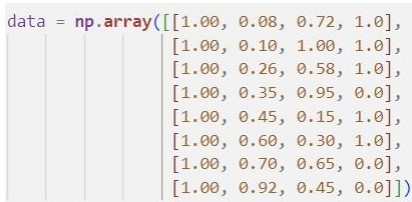

Fig 1: Train Data             

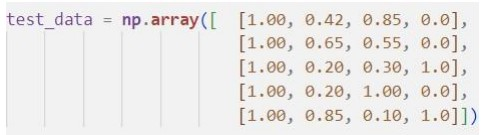

Fig 2: Test Data

Here the first value for every sample is considered 1, as the algorithm says the value of x0 should be always 1. But even without this characteristic, the code will give the correct output.


## Adapt weights


### Import Libraries 📚

In [ ]:
import numpy as np
import math

Since we have used the numpy array method for dataset, we have to import this library for processing the data.


### Load Data 💾

In [ ]:
weights = np.array([0.20, 1.00,  1.00])
threshold = -0.20

data = np.array([[1.00, 0.08, 0.72, 1.0], 
                 [1.00, 0.10, 1.00, 1.0],
                 [1.00, 0.26, 0.58, 1.0],
                 [1.00, 0.35, 0.95, 0.0],
                 [1.00, 0.45, 0.15, 1.0],
                 [1.00, 0.60, 0.30, 1.0],
                 [1.00, 0.70, 0.65, 0.0],
                 [1.00, 0.92, 0.45, 0.0]])

This code snippets represents the first two steps defined in the algorithm. We have initialized the weights and threshold and presented the input value and output in a numpy array. Here the train dataset has 8 data samples. And the threshold value is defined as the negative value of w0.

### Train & Test Data and find Accuracy

In [ ]:
# TRAINING

print("Training:")
epoch = 0
while True:
    epoch += 1
    true_positive = 0
    predicted = []

    for row in data:
        y = row[3]
        net = sum(weights * row[0:3])

        if net >= threshold:
            predicted_y = 1
        else:
            predicted_y = 0

        predicted.append(predicted_y)

#Here we are calculating the net function value by multiplying the input values with corresponding weights. Then we compare the net value with the threshold and labeled the 
#predicted output with 1 or 0.

        if y == predicted_y:
            true_positive += 1
            continue
        elif predicted_y == 0 and y == 1:
            weights[0:3] = weights[0:3] + row[0:3]
        else:
            weights[0:3] = weights[0:3] - row[0:3]

    err = 1 - (true_positive / len(data))
    print(f"Epoch: {epoch}\tTrue Positive: {true_positive}({len(data)})\tErr: {err:.2f}")

    if err <= 0.01:
        print(f"\nNew Weights: {weights}")
        break

        
        
# TESTING

test_data = np.array([  [1.00, 0.42, 0.85, 0.0],
                        [1.00, 0.65, 0.55, 0.0],
                        [1.00, 0.20, 0.30, 1.0],
                        [1.00, 0.20, 1.00, 0.0],
                        [1.00, 0.85, 0.10, 1.0]])

true_positive = 0
for row in test_data:
    y = row[3]
    net = sum(weights * row[0:3])

    if net >= threshold:
        predicted_y = 1
    else:
        predicted_y = 0

    if y == predicted_y:
        true_positive += 1

accuracy = (true_positive / len(test_data)) * 100
print(f"\nTesting:\nTrue Positive: {true_positive}({len(test_data)})\tAccuracy: {accuracy:.2f}%")

- Here we are calculating the net function value by multiplying the input values with corresponding weights. Then we compare the net value with the threshold and labeled the predicted output with 1 or 0.

- After the rest of code is representing the adaptation of new weights. If the predicted output and the actual output, bothvalues are same then the weight would be as it was. If the predicted output is 0 and the actual output is 1, then the weights are added with the input values. In case of predicted output is 1 and actual output is 0, then the input values are subtracted from the previous weights.

- We have calculated the error for every epoch while training our model. After that, we have set a threshold for stopping the loop by error value of less than or equal to 0.01. Then, we printed the new weights, extracted from the algorithm.

- For testing, we considered 5 samples of data. We have predicted the output using the new gained weights and calculated the accuracy with help of true_positive value. Since our dataset was tremendously small, we got an accuracy of 100%.

- This is the output of our perceptron algorithm. For our dataset, after 12 epochs, we got error of almost 0.0 and the program returns a new pair of weights. Then, we used those weight for test dataset and got the accuracy of 100% for test samples.

## Solving AND problem with Widrow-Hoff Delta rule

In [ ]:
#--------- AND PROBLEM -------------#

weights = np.array([0.5, 0.7])
threshold = 0.4
learning_rate = 0.1

data = np.array([[0, 0, 0], 
                 [0, 1, 0],
                 [1, 0, 0],
                 [1, 1, 1]])


# TRAINING

print("Training:")
epoch = 0
while True:
    epoch += 1
    true_positive = 0
    predicted = []

    for row in data:
        y = row[2]
        net = sum(weights * row[0:2])

        if net >= threshold:
            predicted_y = 1
        else:
            predicted_y = 0

        predicted.append(predicted_y)
        
        delta = y - predicted_y

        if y == predicted_y:
            true_positive += 1
            continue
        else:
            weights[0:2] = weights[0:2] + (learning_rate * delta * row[0:2])

    err = 1 - (true_positive / len(data))
    print(f"Epoch: {epoch}\tTrue Positive: {true_positive}({len(data)})\tErr: {err:.2f}")

    if err <= 0.01:
        print(f"\nNew Weights: {weights}")
        break

This code is an implementation of the perceptron learning algorithm to solve a binary classification problem, where the input data has two features and the output is either 0 or 1. The threshold for classification is set to 0.4, and the learning rate is set to 0.1.

The input data is defined as a 4x3 numpy array called data. Each row in the data array contains three values, the first two are input features, and the last one is the target output label. The AND problem can be solved by setting the target output labels based on the logical AND operation of the input features.

The perceptron learning algorithm iteratively updates the weights to minimize the classification error. The weights are initialized with values [0.5, 0.7].

The algorithm runs a loop for training and updates the weights iteratively until the classification error falls below 0.01. In each epoch, the algorithm goes through each row of the data, computes the weighted sum of inputs, and compares it with the threshold to get the predicted output label. If the predicted output label is incorrect, the algorithm adjusts the 
weights based on the learning rate and the error signal. The training results are printed in each epoch, showing the true positives and the classification error. When the classification error falls below 0.01, the algorithm prints the new weights and terminates the training.

This code can solve the AND problem because the input data is defined to contain all the possible combinations of 0 and 1 for two input features, and the target output labels are set based on the logical AND operation of the input features. The perceptron learning algorithm updates the weights based on the error signal, and the algorithm converges to a solution that 
correctly classifies the input data.


### conclusion

The single-layer perceptron technique has drawbacks, such as an inability to handle patterns that cannot be separated linearly and a propensity for overfitting. Moreover, it lacks flexibility in multi-class classification, may converge slowly, and is sensitive to beginning conditions. Its inability to learn intricate patterns and correlations in the data is further hindered by the absence of hidden layers. As we used the output with a solid pattern, it works pretty well, here it makes 100% correct prediction.


